In [54]:
import pandas as pd
import numpy as np
import klib as kl
import seaborn as sns

In [55]:
train = pd.read_csv('/content/sample_data/Train_data.csv')
test = pd.read_csv('/content/sample_data/Test_data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [56]:
train.head()
train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [57]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [60]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [61]:
test.describe(include='object')

,protocol_type,service,flag
count,22544,22544,22544
unique,3,64,11
top,tcp,http,SF
freq,18880,7853,14875


In [62]:
# remove missing values (NaN)
train.dropna(inplace=True)
test.dropna(inplace=True)

In [63]:
# duplicates
print(f"Number of duplicate rows in train: {train.duplicated().sum()}")
print(f"Number of duplicate rows in test: {test.duplicated().sum()}")

Number of duplicate rows in train: 0
Number of duplicate rows in test: 57


In [64]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
25188,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0
25189,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
25190,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


In [65]:
from sklearn.model_selection import train_test_split

X = train.drop(['class'], axis=1)
y = train['class']

In [66]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=42, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=42, test_size=0.5)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

def print_stats(predictions, X, y, title):
    # Predict the anomalies
    print(len(predictions[predictions == -1]), " outliers from ", len(predictions))
    print("0 is anomaly, 1 is normal")
    predictions = [0 if p == -1 else 1 for p in predictions]
    print(classification_report(y, predictions))

    conf = confusion_matrix(y_pred=predictions,y_true=y)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Normal', 'Anomaly']);
    ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
    plt.show()

In [68]:
import tensorflow as tf
from tensorflow.keras import layers, losses

# Keep only the normal data for the training dataset
X_train_normal = X_train[y_train == 1]
X_valid_normal = X_valid[y_valid == 1]

# Input layer
input = tf.keras.layers.Input(shape=(41,))

# Encoder layers
encoder = tf.keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu')])(input)

# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(8, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(41, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [69]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')
# Fit the autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=256,validation_data=(X_valid_normal, X_valid_normal),shuffle=True)

Epoch 1/20
43/43 [==============================] - 2s 9ms/step - loss: 382.9182 - val_loss: 570.2969
Epoch 2/20
43/43 [==============================] - 0s 6ms/step - loss: 382.6883 - val_loss: 570.1591
Epoch 3/20
43/43 [==============================] - 0s 5ms/step - loss: 382.6291 - val_loss: 570.1561
Epoch 4/20
43/43 [==============================] - 0s 5ms/step - loss: 382.6273 - val_loss: 570.1554
Epoch 5/20
43/43 [==============================] - 0s 5ms/step - loss: 382.6267 - val_loss: 570.1550
Epoch 6/20
43/43 [==============================] - 0s 5ms/step - loss: 382.6262 - val_loss: 570.1544
Epoch 7/20
43/43 [==============================] - 0s 6ms/step - loss: 382.6258 - val_loss: 570.1542
Epoch 8/20
43/43 [==============================] - 0s 9ms/step - loss: 382.6256 - val_loss: 570.1541
Epoch 9/20
43/43 [==============================] - 0s 8ms/step - loss: 382.6255 - val_loss: 570.1539
Epoch 10/20
43/43 [==============================] - 0s 7ms/step - loss: 382.6255 

79/79 [==============================] - 0s 2ms/step
1  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1197
           1       0.52      1.00      0.69      1323

    accuracy                           0.52      2520
   macro avg       0.26      0.50      0.34      2520
weighted avg       0.28      0.52      0.36      2520



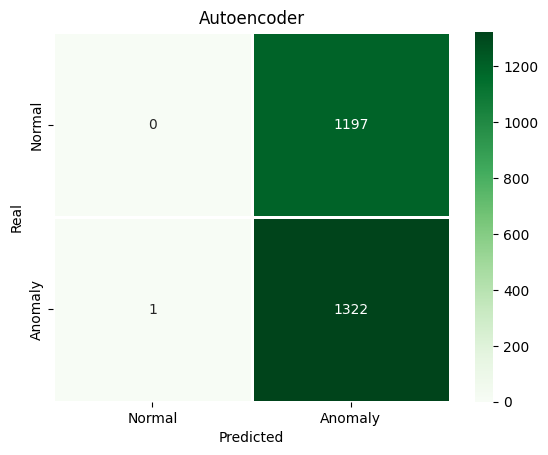

In [70]:
# Calculate MAE loss for validation data
valid_predictions = autoencoder.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.max(valid_loss)

# Detect anomalies in the test set
test_predictions = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
test_loss = np.array(test_loss)  # Convert Series to NumPy array
test_loss = test_loss.reshape((-1))

predictions = np.array([-1 if loss > threshold else 1 for loss in test_loss])
print_stats(predictions, X_test, y_test, "Autoencoder")

In [ ]:
##############  NEURAL NETWORK  ###################################

In [71]:
dfPhase = pd.read_csv('/content/sample_data/Phase1.csv')
dfPhase2 = pd.read_csv('/content/sample_data/Phase2.csv')

In [72]:
print(dfPhase2.info())
kl.missingval_plot(dfPhase,figsize=(6,5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [33]:
print(dfPhase2.shape)

dfPhase2.drop_duplicates(subset=dfPhase2.columns[1:],inplace=True)

print(dfPhase2.shape)

(25192, 42)
(24995, 42)


In [46]:
# Target Encoding
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

le = LabelEncoder()
encoder = TargetEncoder()


dfPhase2['class'] = le.fit_transform(dfPhase2['class'])


for col in dfPhase2.columns:
    if col != 'class' and not is_numeric_dtype(dfPhase2[col]):
        print(col)
        dfPhase2[col] = encoder.fit_transform(dfPhase2[col], dfPhase2['class'])


dfPhase2.head()

protocol_type
service
flag


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0.524659,0.717049,0.845423,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,0.830986,0.655126,0.845423,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0.524659,0.046222,0.011414,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,0.524659,0.945146,0.845423,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,0.524659,0.945146,0.845423,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [47]:
# Splitting the data into train and test

X = dfPhase2.drop('class',axis=1)
y = dfPhase2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Epoch 1/20
547/547 [==============================] - 6s 4ms/step - loss: 0.3017 - val_loss: 0.1076
Epoch 2/20
547/547 [==============================] - 2s 4ms/step - loss: 0.1568 - val_loss: 0.0852
Epoch 3/20
547/547 [==============================] - 2s 4ms/step - loss: 0.1356 - val_loss: 0.0734
Epoch 4/20
547/547 [==============================] - 3s 5ms/step - loss: 0.1057 - val_loss: 0.0650
Epoch 5/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0965 - val_loss: 0.0599
Epoch 6/20
547/547 [==============================] - 4s 7ms/step - loss: 0.0848 - val_loss: 0.0555
Epoch 7/20
547/547 [==============================] - 6s 10ms/step - loss: 0.0751 - val_loss: 0.0539
Epoch 8/20
547/547 [==============================] - 5s 9ms/step - loss: 0.0679 - val_loss: 0.0525
Epoch 9/20
547/547 [==============================] - 3s 6ms/step - loss: 0.0642 - val_loss: 0.0506
Epoch 10/20
547/547 [==============================] - 2s 4ms/step - loss: 0.0625 - val_loss: 0.051

<Axes: >

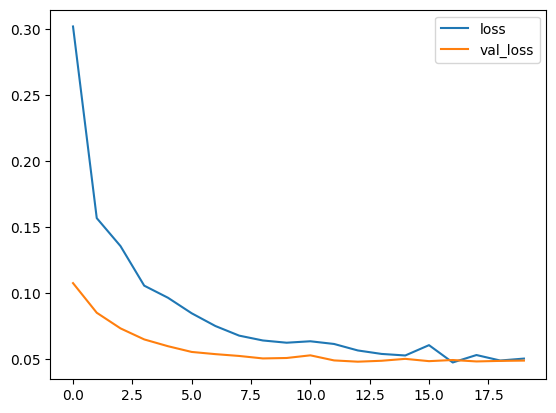

In [48]:
# Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test))

losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [49]:
# evaluating the model

predictions = model.predict(X_test)
predictions = (predictions > 0.32)           # here we added a threshold value, we sacrifice a bit recall for precision, but it's higher than the one we used before
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

235/235 [==============================] - 0s 2ms/step
[[3404   99]
 [  25 3971]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3503
           1       0.98      0.99      0.98      3996

    accuracy                           0.98      7499
   macro avg       0.98      0.98      0.98      7499
weighted avg       0.98      0.98      0.98      7499



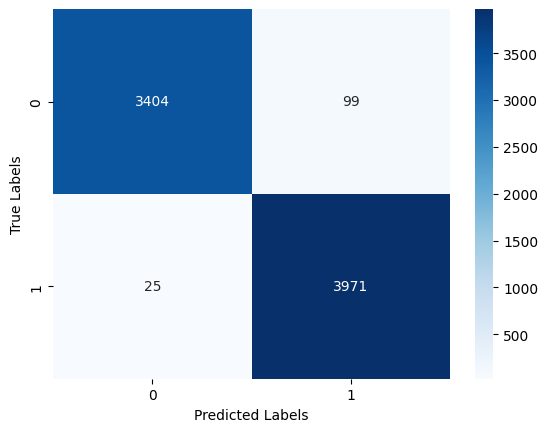

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()